In [ ]:
!wget -O data.csv  https://drive.usercontent.google.com/u/0/uc?id=1tJaiv0aXMr2Lri8xKNLXzf3L6t6uCJ2Y&export=download


--2024-06-26 09:46:52--  https://drive.usercontent.google.com/u/0/uc?id=1tJaiv0aXMr2Lri8xKNLXzf3L6t6uCJ2Y
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.183.132, 2607:f8b0:4001:c64::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.183.132|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.usercontent.google.com/uc?id=1tJaiv0aXMr2Lri8xKNLXzf3L6t6uCJ2Y [following]
--2024-06-26 09:46:52--  https://drive.usercontent.google.com/uc?id=1tJaiv0aXMr2Lri8xKNLXzf3L6t6uCJ2Y
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1tJaiv0aXMr2Lri8xKNLXzf3L6t6uCJ2Y [following]
--2024-06-26 09:46:52--  https://drive.usercontent.google.com/download?id=1tJaiv0aXMr2Lri8xKNLXzf3L6t6uCJ2Y
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, await

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


In [ ]:

data = pd.read_csv('data.csv')
data.head()




,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,46043,4.884200e+04,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


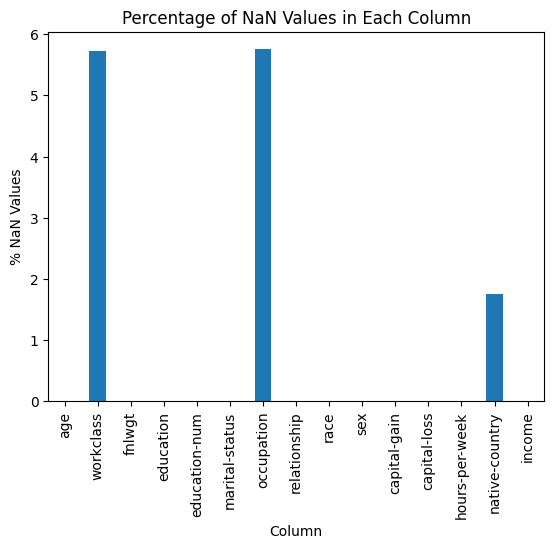

age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
income            0.000000
dtype: float64

In [ ]:
nan_percentages = data.isnull().sum() / len(data) * 100
nan_percentages.plot(kind='bar')
plt.xlabel('Column')
plt.ylabel('% NaN Values')
plt.title('Percentage of NaN Values in Each Column')
plt.show()
nan_percentages

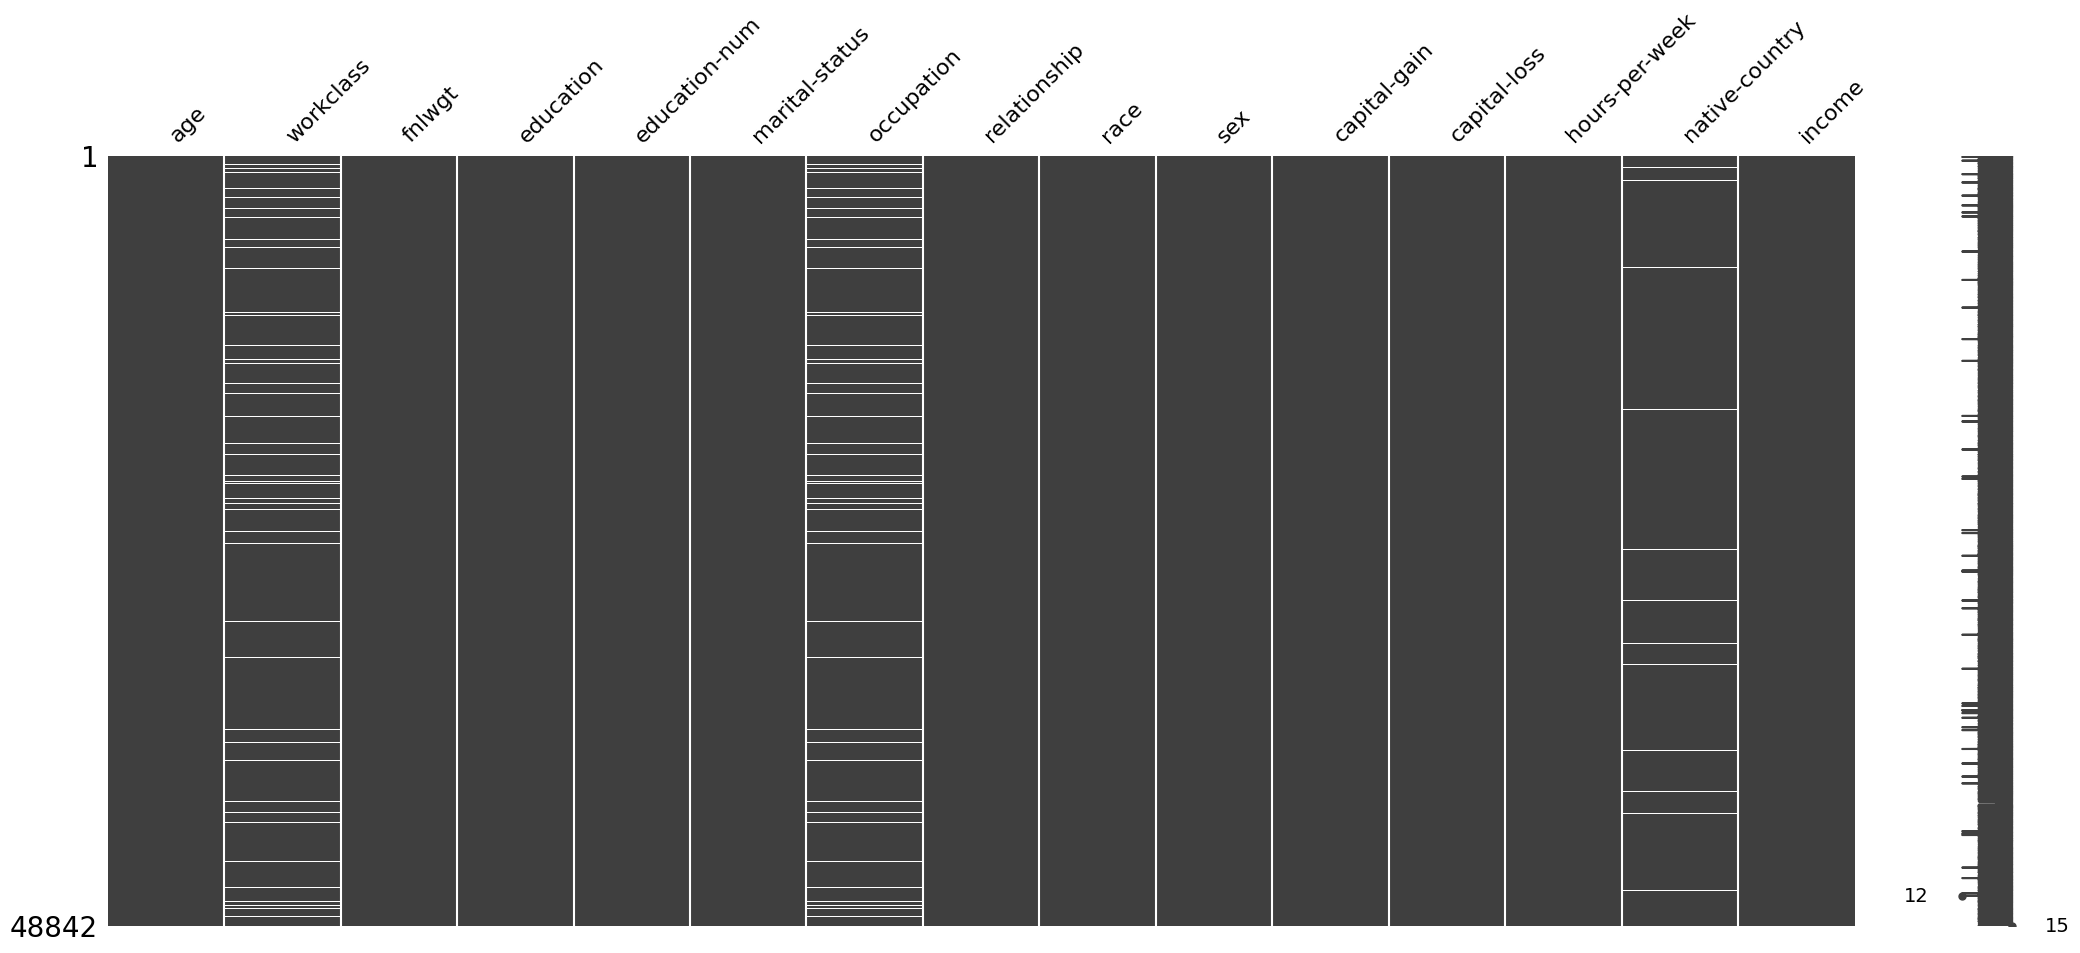

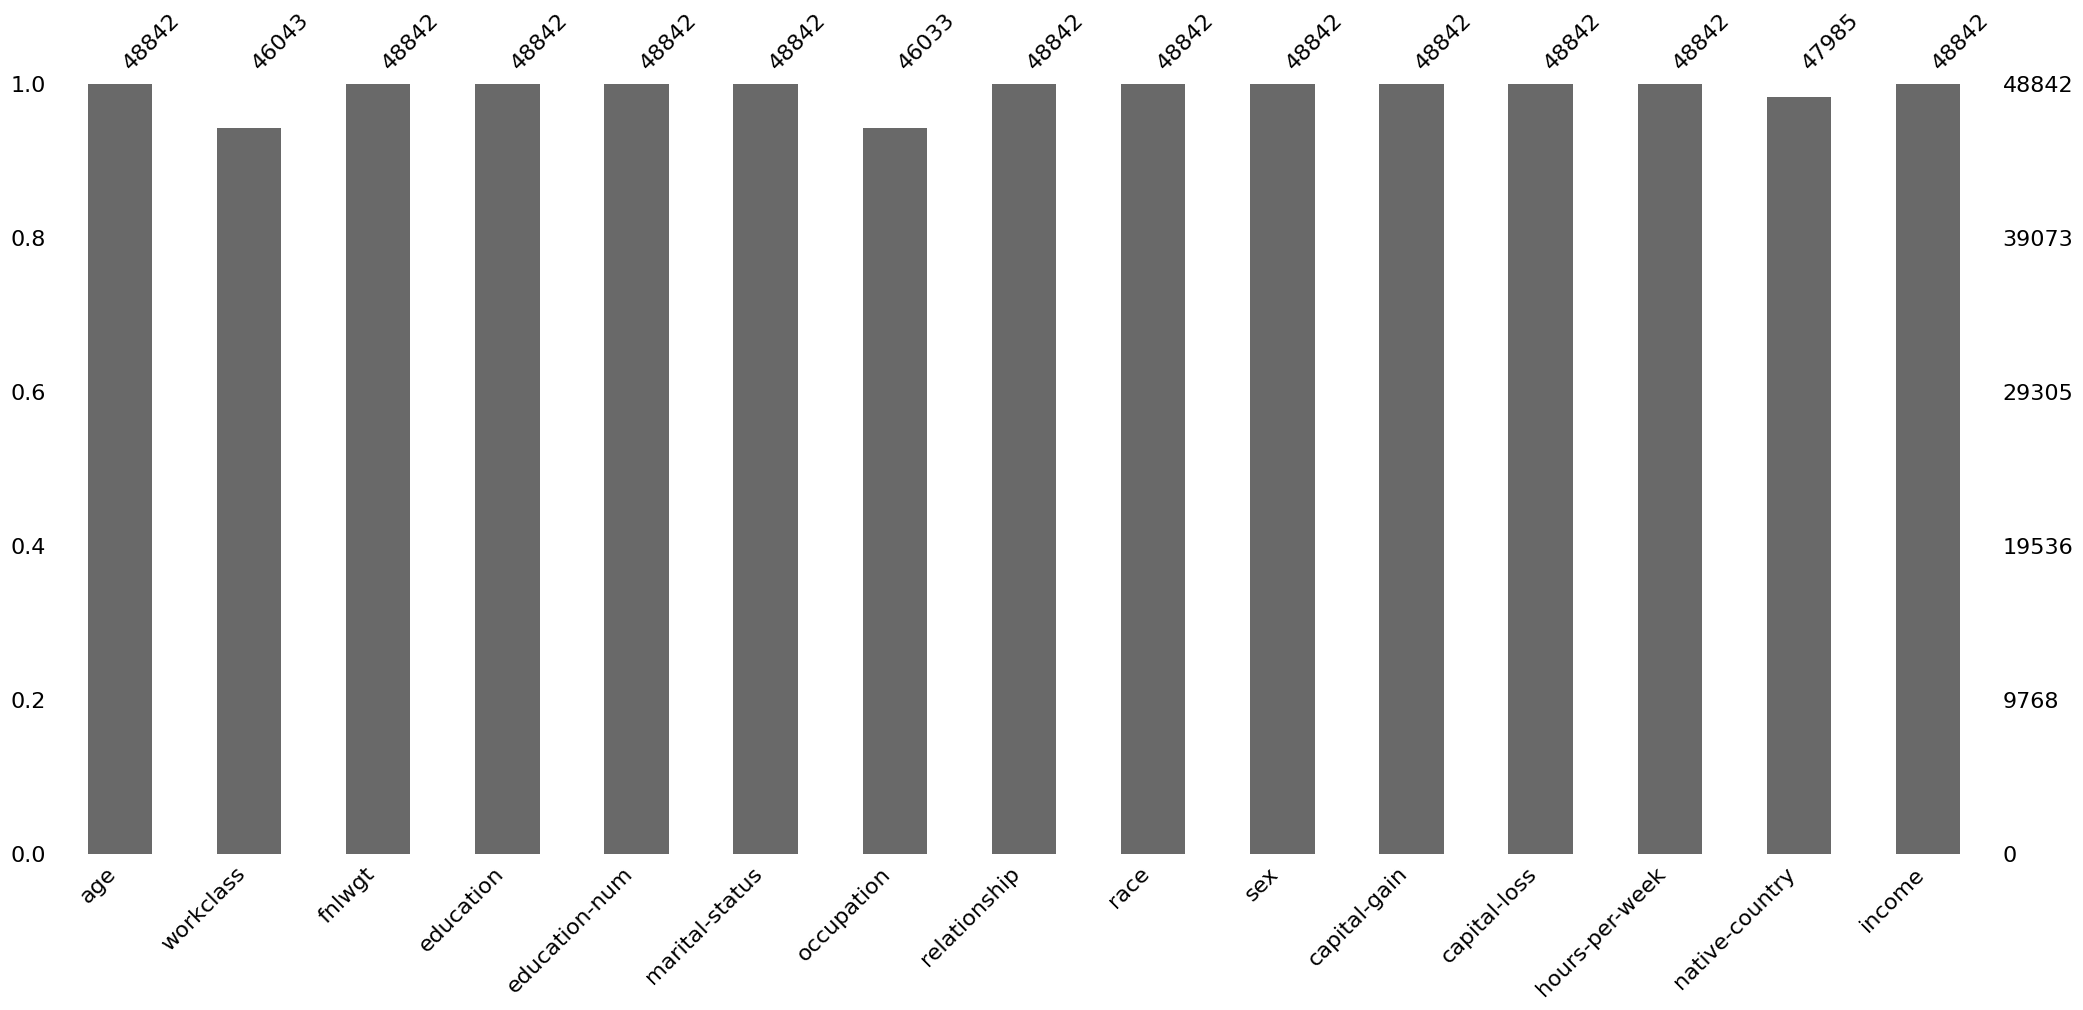

In [ ]:
# رسم مصفوفة القيم المفقودة
msno.matrix(data)
plt.show()

# رسم شريط القيم المفقودة
msno.bar(data)
plt.show()

In [ ]:
data = data.dropna(subset=['native-country'])

In [ ]:
data['workclass'].fillna('Unknown', inplace=True)
data['occupation'].fillna('Unknown', inplace=True)

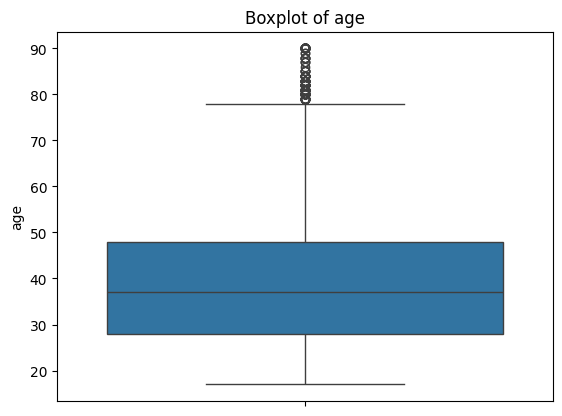

In [ ]:
  feature = 'age'
  sns.boxplot(data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

<p dir="rtl">نلاحظ أن الأعمار التي تم تحديدها كقيم شاذة (مثل  80، 81، 83، و 90) هي أعمار طبيعية يمكن أن توجد في أي مجموعة سكانية. وبالتالي، لا تعتبر غير منطقية أو غير قابلة للتصديق.</p>




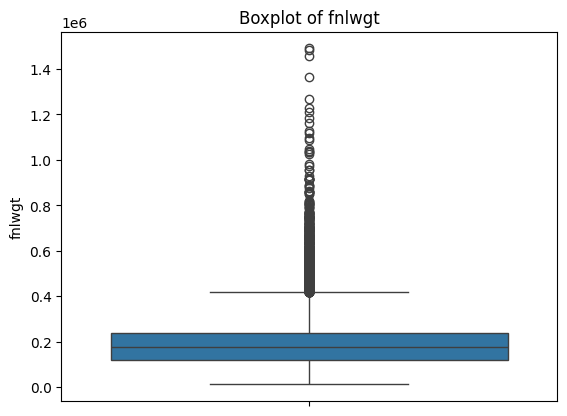

In [ ]:
  feature = 'fnlwgt'
  sns.boxplot(data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

<p dir="rtl">بدلاً من حذف القيم الشاذة (القيم التي أكبر من Upper bound)، قمنا باستبدالها بالقيمة العليا المحددة. لتجنب فقدان أي صفوف في البيانات.</p>




In [ ]:
Q1_fnlwgt = data['fnlwgt'].quantile(0.25)
Q3_fnlwgt = data['fnlwgt'].quantile(0.75)
IQR_fnlwgt = Q3_fnlwgt - Q1_fnlwgt

upper_bound_fnlwgt = Q3_fnlwgt + 1.5 * IQR_fnlwgt

data['fnlwgt'] = data['fnlwgt'].apply(lambda x: upper_bound_fnlwgt if x > upper_bound_fnlwgt else x)

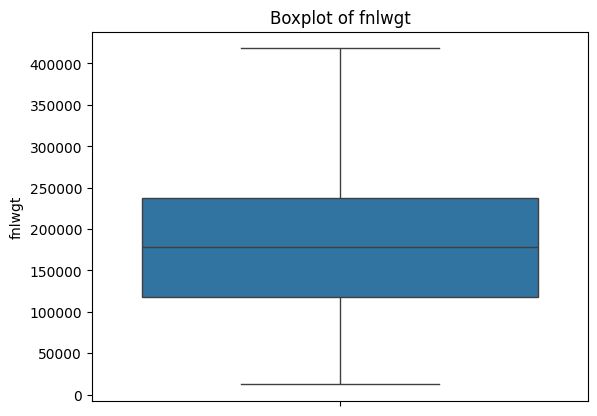

In [ ]:
  feature = 'fnlwgt'
  sns.boxplot(data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

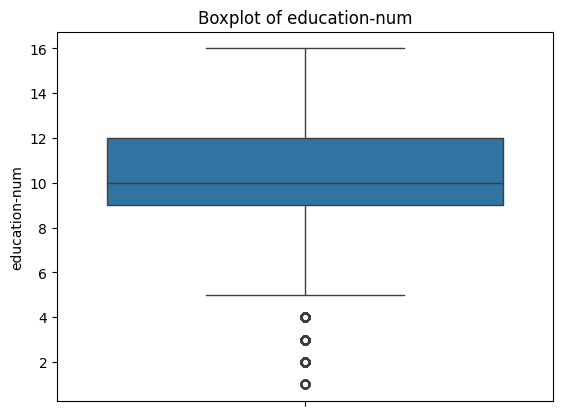

In [ ]:
  feature = 'education-num'
  sns.boxplot(data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

<p dir="rtl">نلاحظ أن سنوات التعليم التي تم تحديدها كقيم شاذة (مثل  4، 3، 2 و 1) هي  طبيعية يمكن أن توجد في أي مجموعة سكانية. وبالتالي، لا تعتبر غير منطقية أو غير قابلة للتصديق.<br>
ونلاحظ ذلك من مهنة الشخص التي قضى سنوات تعليم أقل من 5 سنوات حيث أن مهنته هي مهنة لا تتطلب التعليم.<br>
مع بعض الحالات الاستثنائية التي من الممكن أن شخص  تعلم أقل من 5 سنوات لكنه استلم مناصب إدارية او تنفيذية

---


</p>




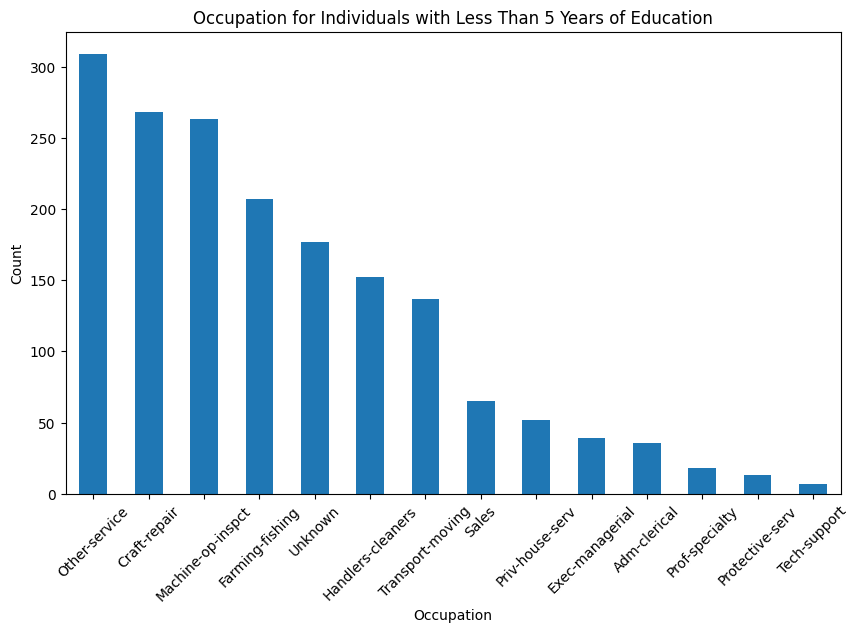

In [ ]:

low_education_data = data[data['education-num'] < 5]

occupation_counts = low_education_data['occupation'].value_counts()

plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar')
plt.title('Occupation for Individuals with Less Than 5 Years of Education')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
data['income'].unique()


array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [ ]:
data = data.replace({'<=50K.': '<=50K', '>50K.': '>50K'})

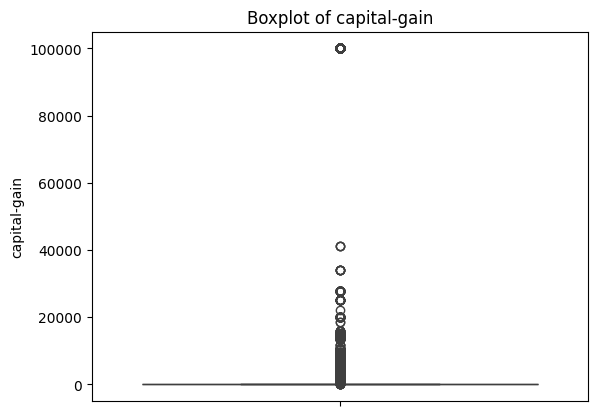

In [ ]:
  feature = 'capital-gain'
  sns.boxplot(data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

<p dir="rtl"> نلاحظ أن القيم الكبيرة الشاذة مثل 99999 هي قليلة ونادرة، لكن وجودها قد يكون مبررًا في سياق الأرباح الاستثمارية الكبيرة. بدلاً من اعتبارها شاذة

---
</p>




In [ ]:

print(f"Number of observations having capital gain of 99999:{data.loc[data['capital-gain'] == 99999,:].shape}")
print(f"Income counts: {data.loc[data['capital-gain'] == 99999,:]['income'].value_counts()}")

Number of observations having capital gain of 99999:(234, 15)
Income counts: income
>50K    234
Name: count, dtype: int64


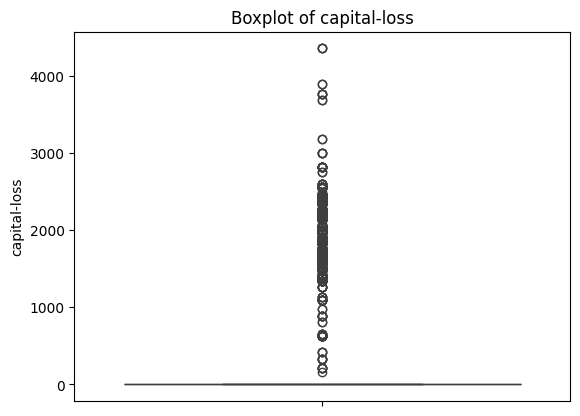

In [ ]:
  feature = 'capital-loss'
  sns.boxplot(data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

<p dir="rtl"> نلاحظ أن القيم الشاذة مثل 5000 هي قليلة ونادرة، لكن وجودها قد يكون مبررًا في سياق الخسائر الاستثمارية. بدلاً من اعتبارها شاذة

---


</p>




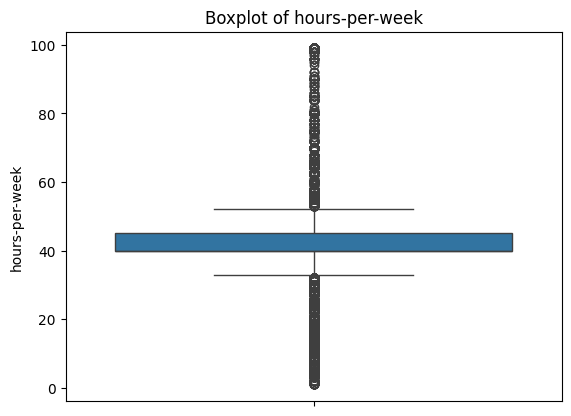

In [ ]:
  feature = 'hours-per-week'
  sns.boxplot(data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

<p dir="rtl"> منطقية القيم الشاذة<br>
القيم العالية: من المنطقي أن يكون هناك بعض الأفراد الذين يعملون ساعات طويلة جدًا (حتى 99 ساعة في الأسبوع) في بعض الوظائف أو الفترات الزمنية.<br>
القيم المنخفضة: أيضًا من المنطقي أن يكون هناك بعض الأفراد الذين يعملون بشكل جزئي أو في وظائف غير تقليدية .<br>
لكن في الغالب أن حالة ساعات العمل أقل من 28 ساعة غير مقبولة دائماً أو أن تكون   أكبر  من 60 الا في حالات اسثنائية كما قلنا

---
</p>






In [ ]:
lower_bound_hours = 28
upper_bound_hours = 60

data['hours-per-week'] = data['hours-per-week'].apply(lambda x: upper_bound_hours if x > upper_bound_hours else (lower_bound_hours if x < lower_bound_hours else x))

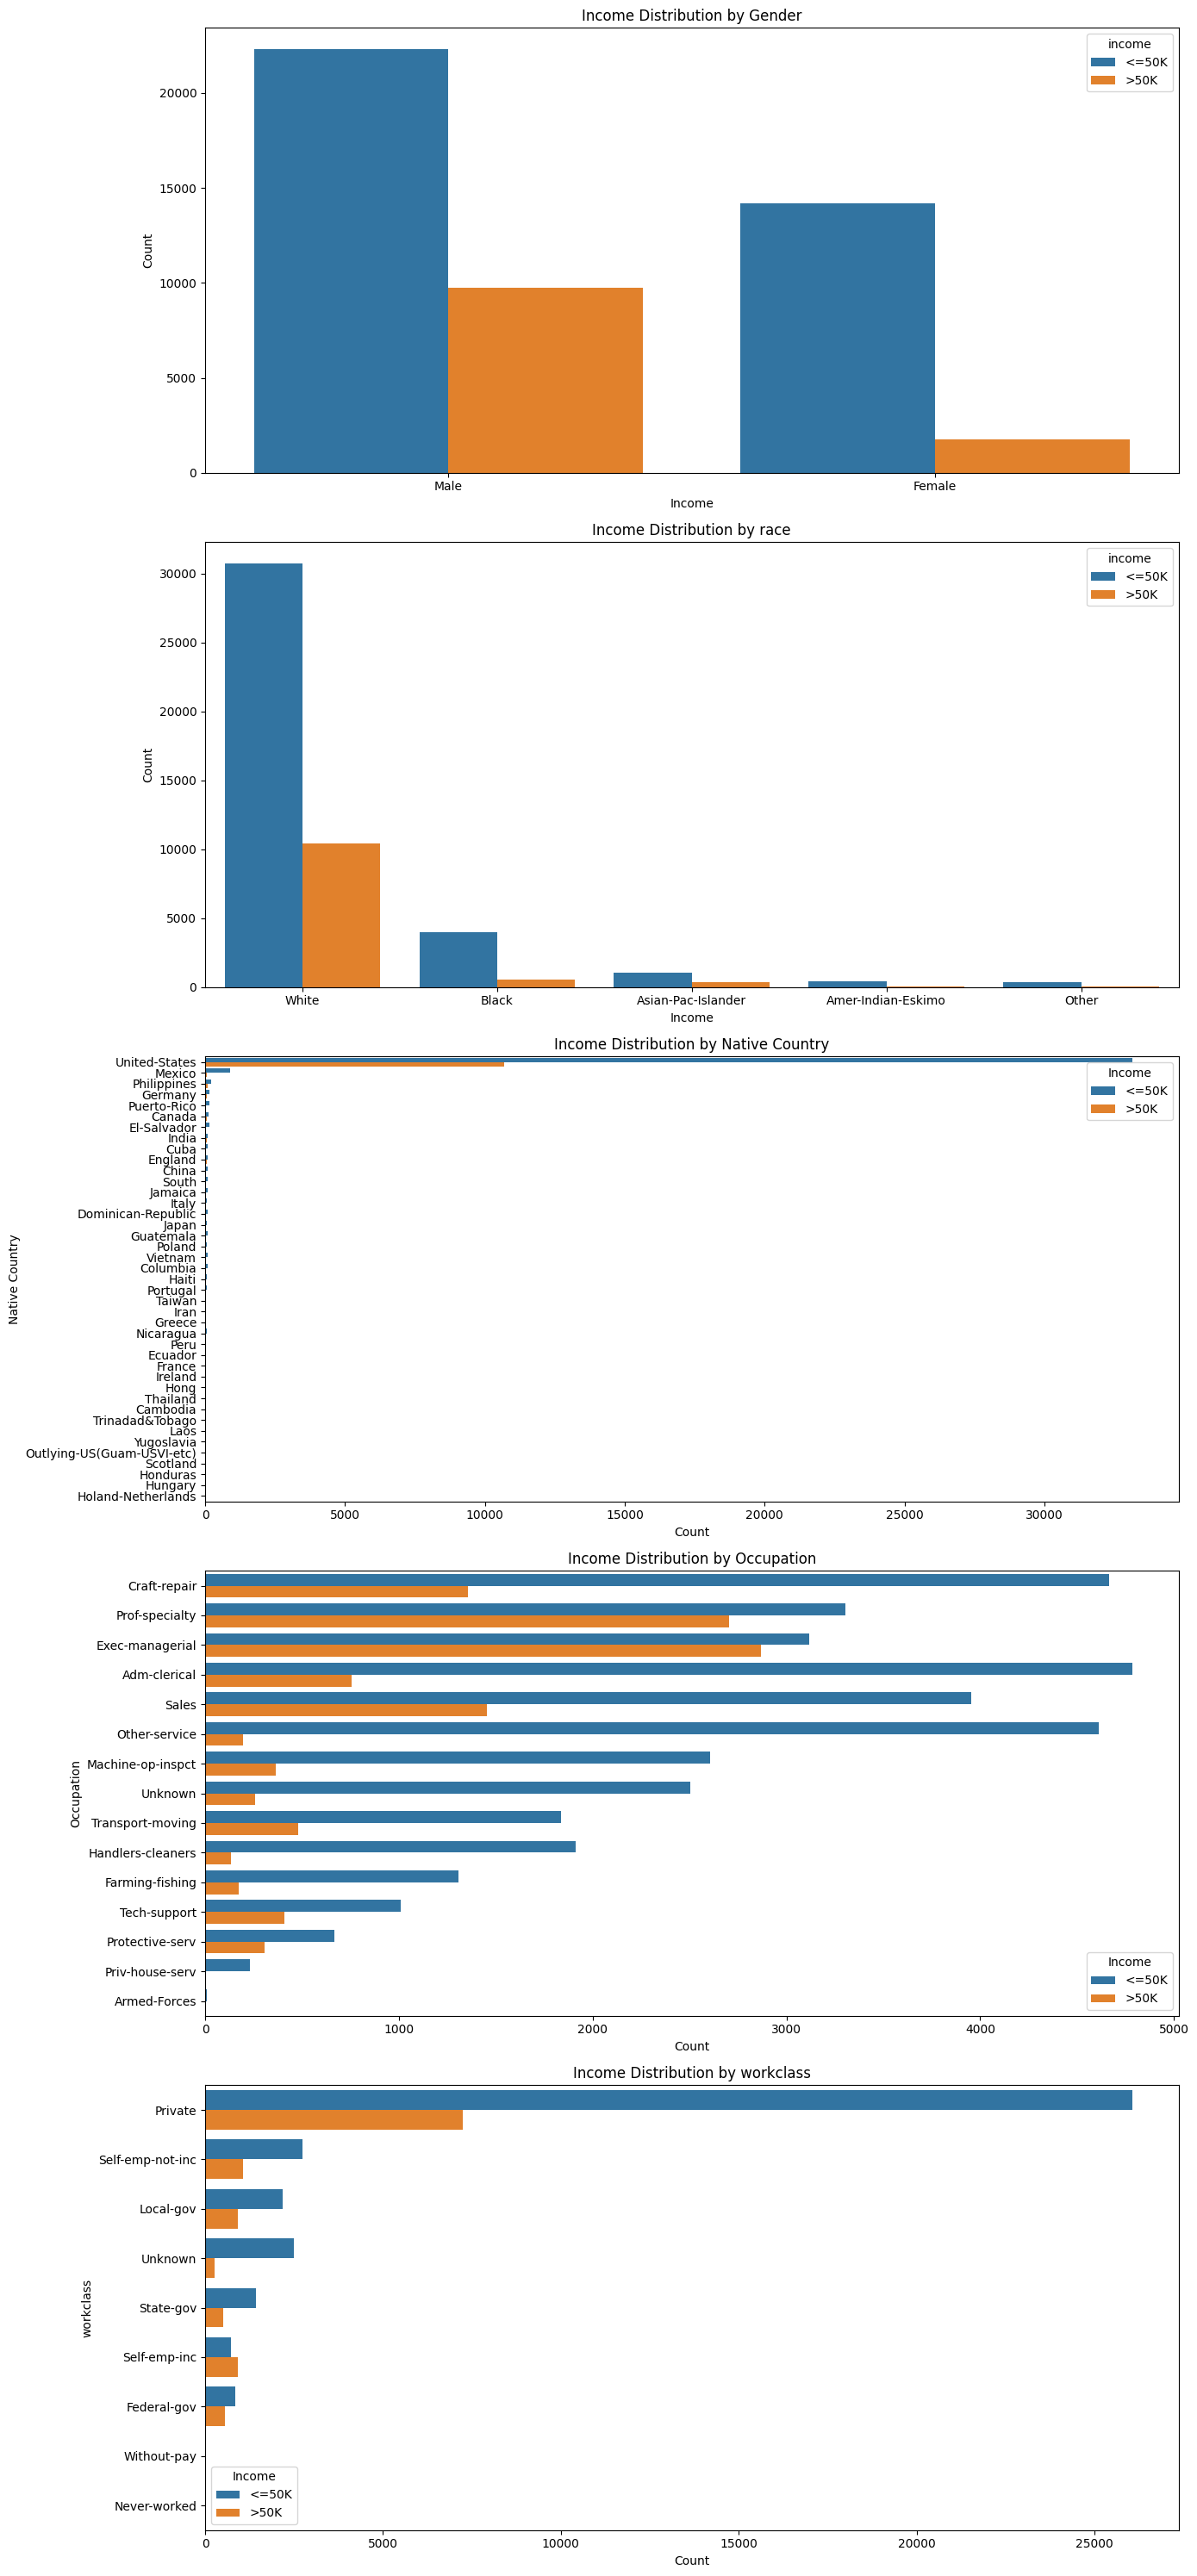

In [ ]:


# Create a figure to hold all subplots
fig, axes = plt.subplots(5, 1, figsize=(14, 30))

# Plot each chart in a subplot
sns.countplot(x='sex', hue='income', data=data, ax=axes[0])
axes[0].set_title('Income Distribution by Gender')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Count')

sns.countplot(x='race', hue='income', data=data, ax=axes[1])
axes[1].set_title('Income Distribution by race')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Count')

sns.countplot(data=data, y='native-country', hue='income', order=data['native-country'].value_counts().index, ax=axes[2])
axes[2].set_title('Income Distribution by Native Country')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Native Country')
axes[2].legend(title='Income')

sns.countplot(data=data, y='occupation', hue='income', order=data['occupation'].value_counts().index, ax=axes[3])
axes[3].set_title('Income Distribution by Occupation')
axes[3].set_xlabel('Count')
axes[3].set_ylabel('Occupation')
axes[3].legend(title='Income')

sns.countplot(data=data, y='workclass', hue='income', order=data['workclass'].value_counts().index, ax=axes[4])
axes[4].set_title('Income Distribution by workclass')
axes[4].set_xlabel('Count')
axes[4].set_ylabel('workclass')
axes[4].legend(title='Income')



# Adjust layout
plt.tight_layout()



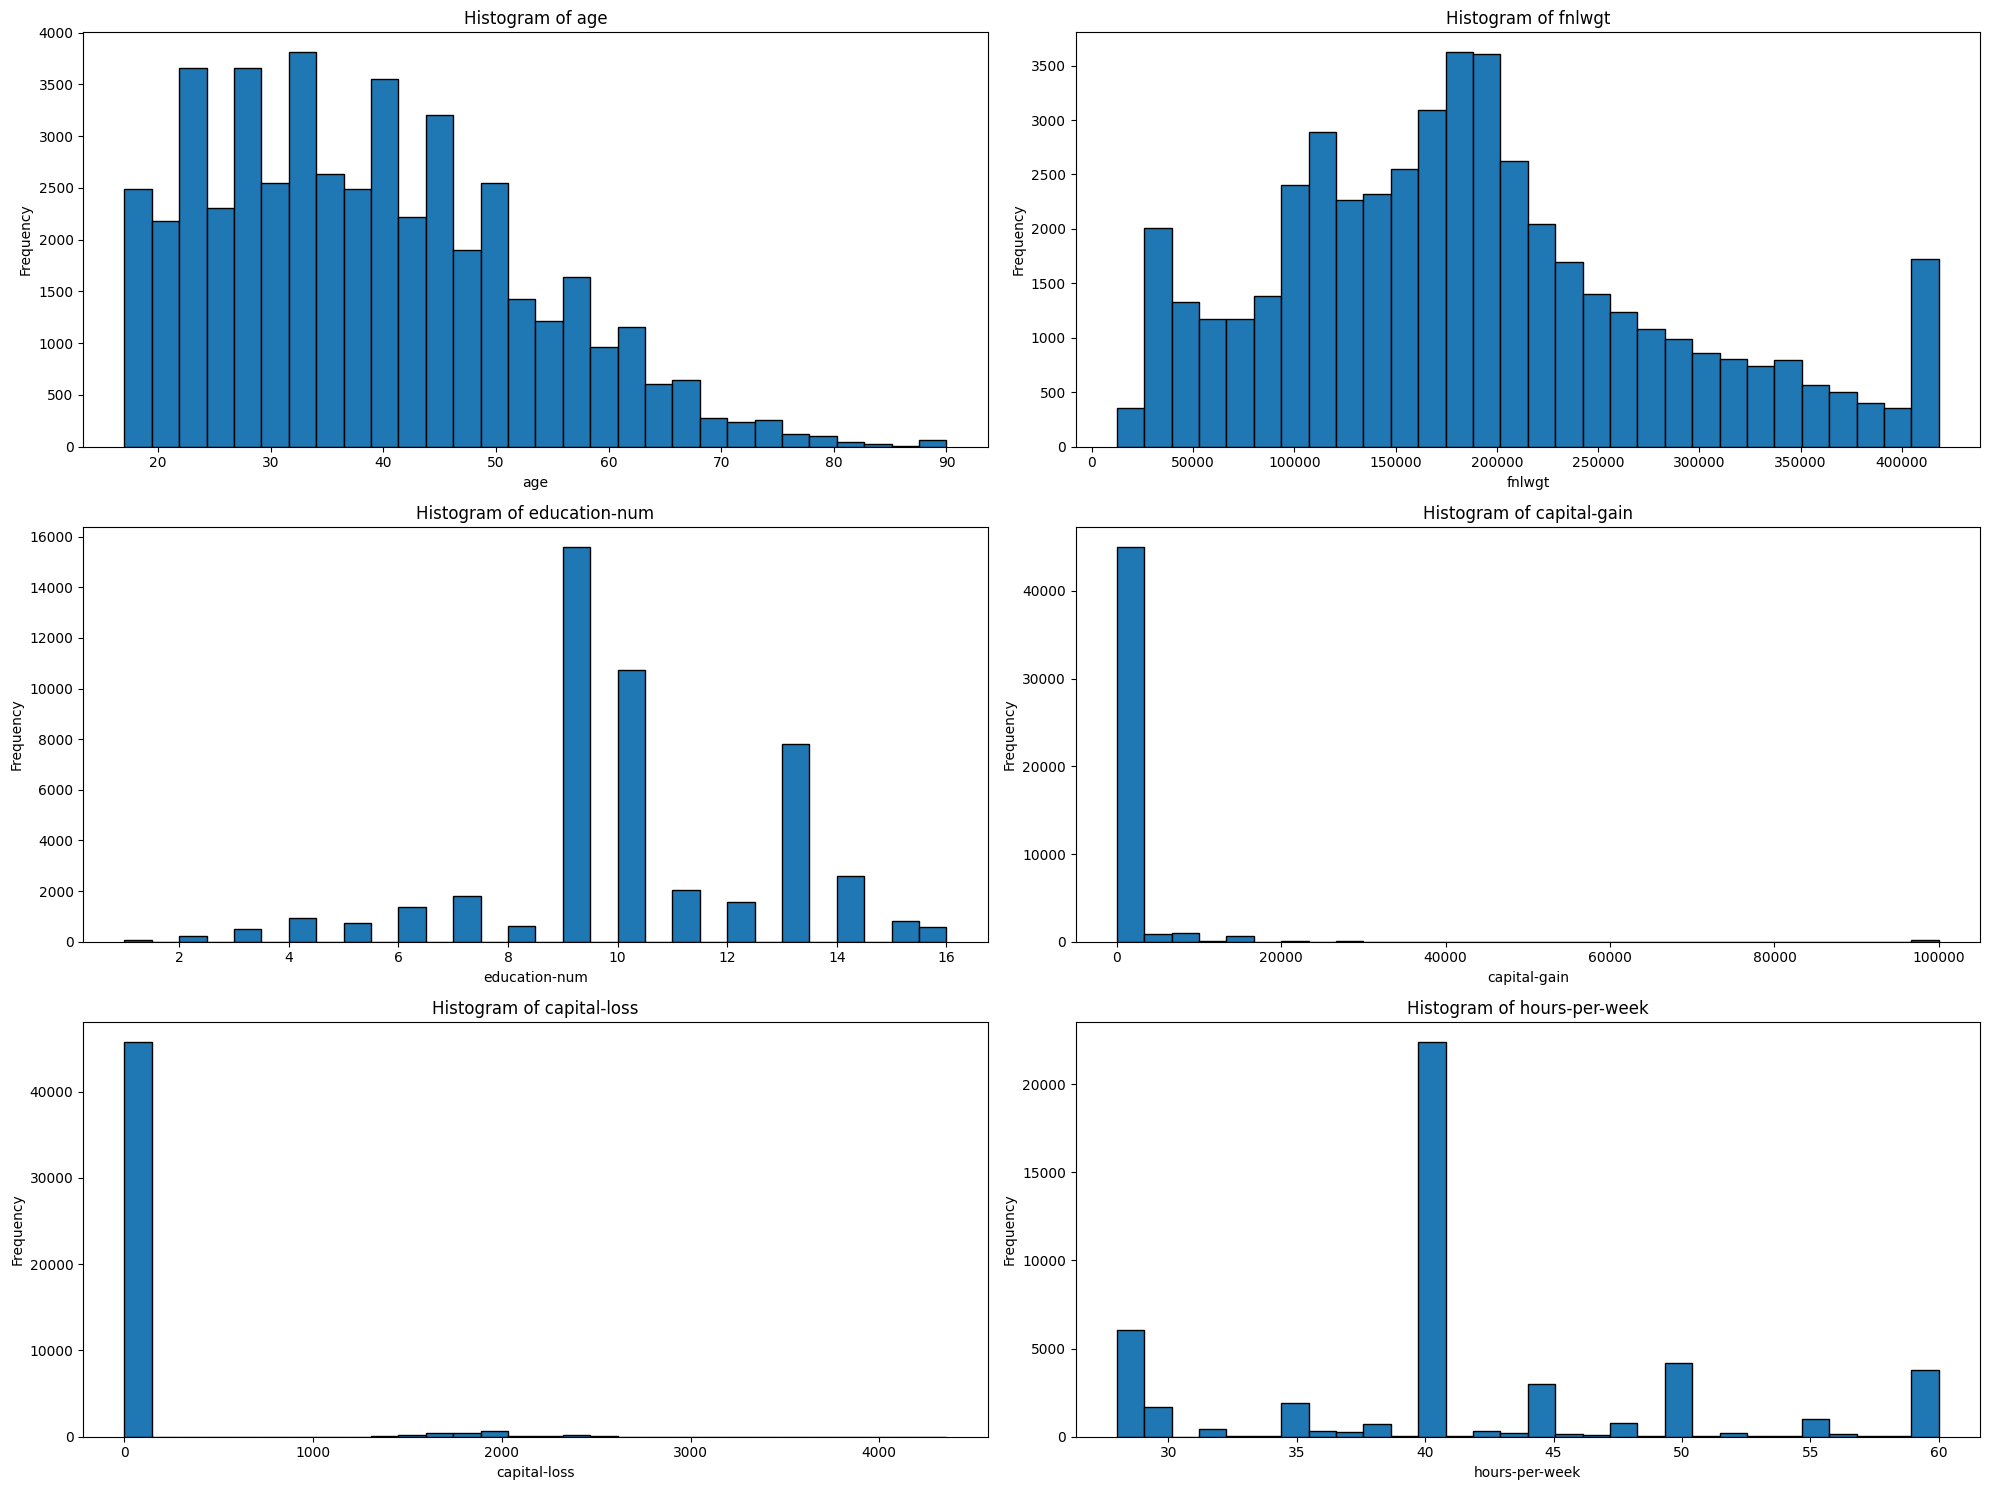

In [ ]:
columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    plt.hist(data[column], bins=30, edgecolor='k')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

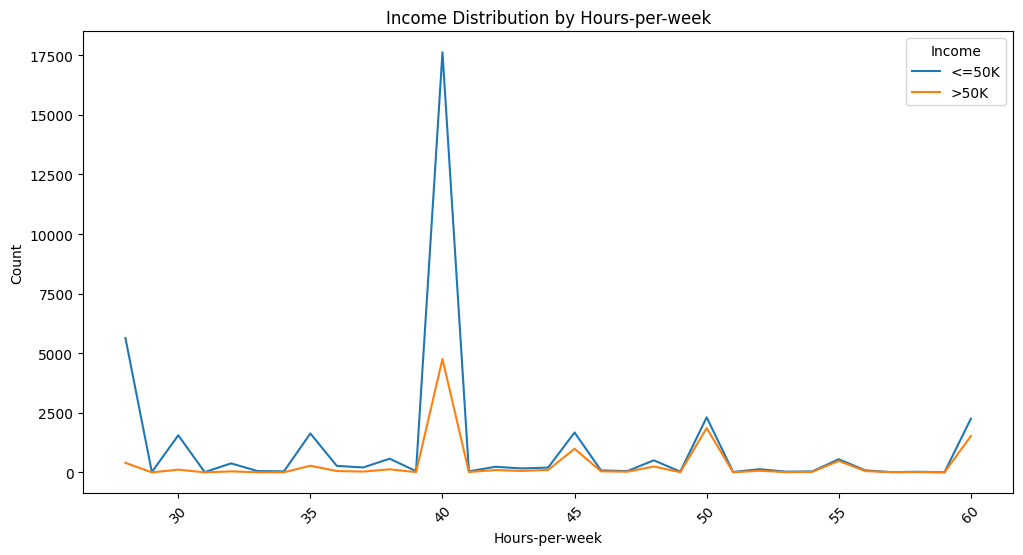

In [ ]:
# حساب توزيع الدخل حسب ساعات العمل الأسبوعية
income_hours_distribution = data.groupby(['hours-per-week', 'income']).size().unstack()

# رسم مخطط توزيع الدخل حسب ساعات العمل الأسبوعية
income_hours_distribution.plot(kind='line', figsize=(12, 6))
plt.title('Income Distribution by Hours-per-week')
plt.xlabel('Hours-per-week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()

<p dir="rtl">
يوضح هذا المخطط توزيع الدخل حسب عدد ساعات العمل الأسبوعية. يمكن ملاحظة أن:<br>
هناك تركيز كبير للأفراد الذين يعملون حوالي 40 ساعة في الأسبوع، حيث أن الأغلبية يكسبون أقل من 50K$.
<br>
عدد الأفراد الذين يعملون ساعات أقل من 40 أو أكثر من 40 ساعة يكسبون بشكل متساوي تقريبًا أكثر وأقل من 50000 دولار

---
</p>






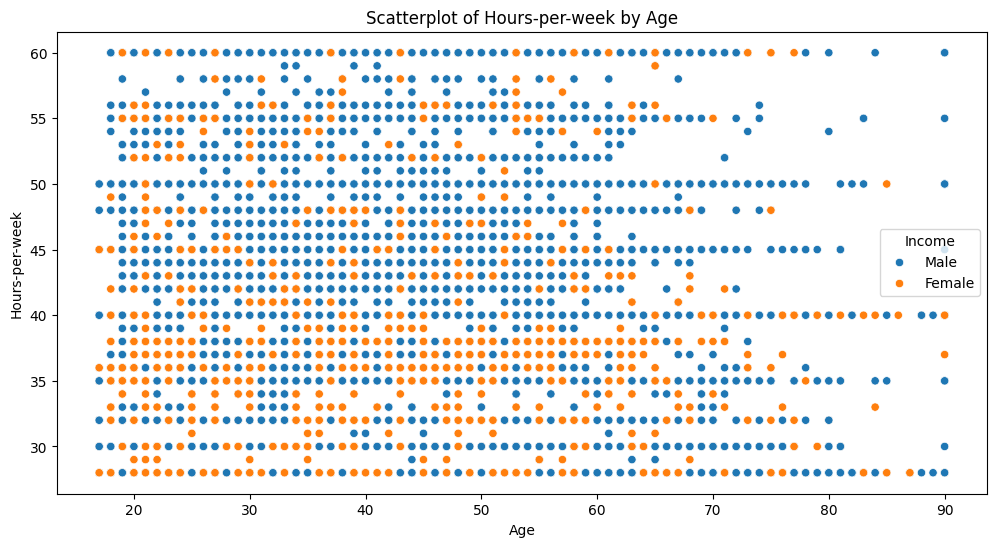

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='age', y='hours-per-week', hue='sex')
plt.title('Scatterplot of Hours-per-week by Age')
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.legend(title='Income')
plt.show()

<p dir="rtl">يوضح هذا المخطط العلاقة بين عدد ساعات العمل الأسبوعية (Hours-per-Week) والعمر (Age) مع تمييز الجنس (Male, Female). يمكن ملاحظة أن:<br>
هناك تنوع واسع في عدد ساعات العمل عبر جميع الفئات العمرية.
هناك تجمعات كثيفة للنقاط حول 40 ساعة في الأسبوع في جميع الأعمار، مما يعكس العمل بدوام كامل.
عندما تكون عدد الساعات فوق ال 40 ساعة عمل أسبوعية نلاحظ أن الذكور هم الأكثر في عدد ساعات العمل الكثيرة.

---
</p>






In [ ]:
import plotly.express as px
fig = px.sunburst(data, path=['sex', 'occupation', 'income'], values='fnlwgt',
                  title='Sunburst Chart of Income Distribution by Occupation and Sex')
fig.show()

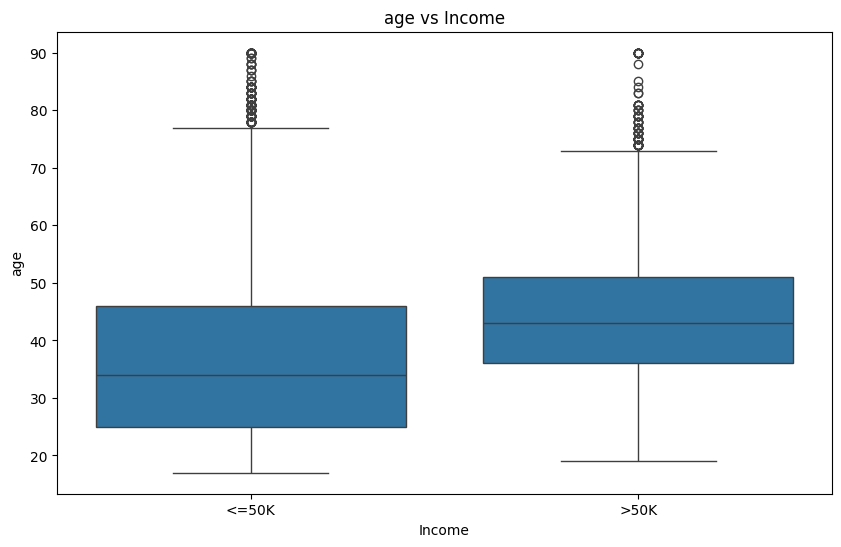

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=data)
plt.title('age vs Income')
plt.xlabel('Income')
plt.ylabel('age')
plt.show()


<p dir="rtl">القيم الشاذة: وجود بعض القيم الشاذة في كلا الفئتين يشير إلى أن هناك بعض الأفراد الذين يحصلون على دخل جيد رغم أنهم أكبر سناً أو العكس، مما قد يعكس وجود عوامل أخرى تؤثر على الدخل بجانب العمر.

---
</p>






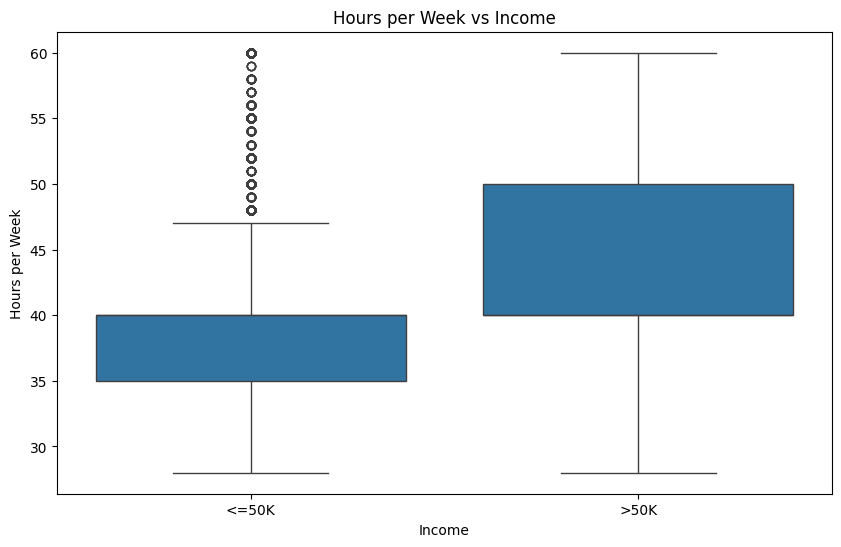

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=data)
plt.title('Hours per Week vs Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()


<p dir="rtl">القيم الشاذة: وجود بعض القيم الشاذة بين الأفراد الذين يكسبون <= 50K يشير إلى أن هناك بعض الأفراد في هذه الفئة يعملون ساعات طويلة لكنهم لا يزالون يحصلون على دخل أقل

---
</p>






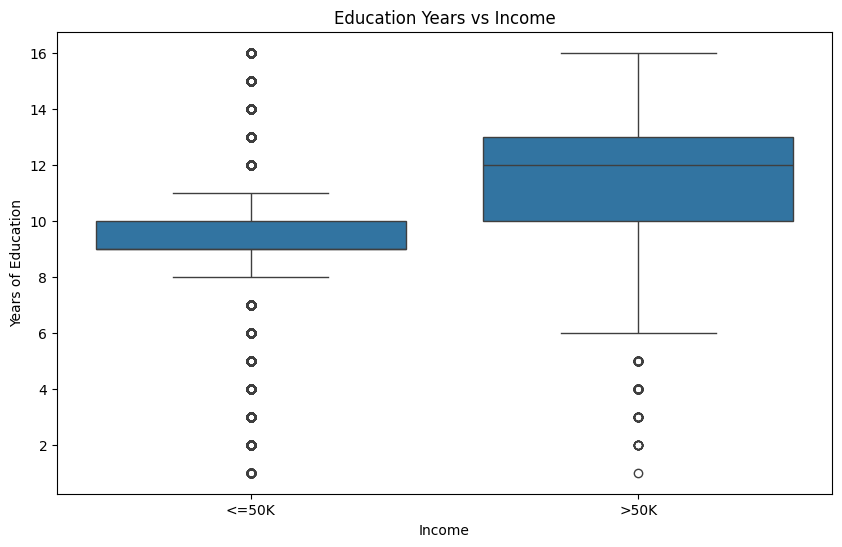

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='education-num', data=data)
plt.title('Education Years vs Income')
plt.xlabel('Income')
plt.ylabel('Years of Education')
plt.show()


<p dir="rtl">القيم الشاذة: وجود بعض القيم الشاذة في كلا الفئتين يشير إلى أن هناك بعض الأفراد الذين يحصلون على دخل جيد رغم أنهم لم يكملوا تعليمهم، أو العكس، مما قد يعكس وجود عوامل أخرى تؤثر على الدخل بجانب التعليم.

---
</p>






In [ ]:
data2 = data.copy()
data3 = data.copy()

In [ ]:
# Feature Engineering: Add additional features
bins = [0, 25, 45, 65, 100]
labels = ['Young', 'Adult', 'Senior', 'Elderly']
data3['age_category'] = pd.cut(data3['age'], bins=bins, labels=labels, right=False)

In [ ]:
import plotly.express as px
fig = px.sunburst(data3, path=['age_category', 'occupation', 'income'], values='fnlwgt',
                  title='Sunburst Chart of Income Distribution by Occupation and Sex')
fig.show()

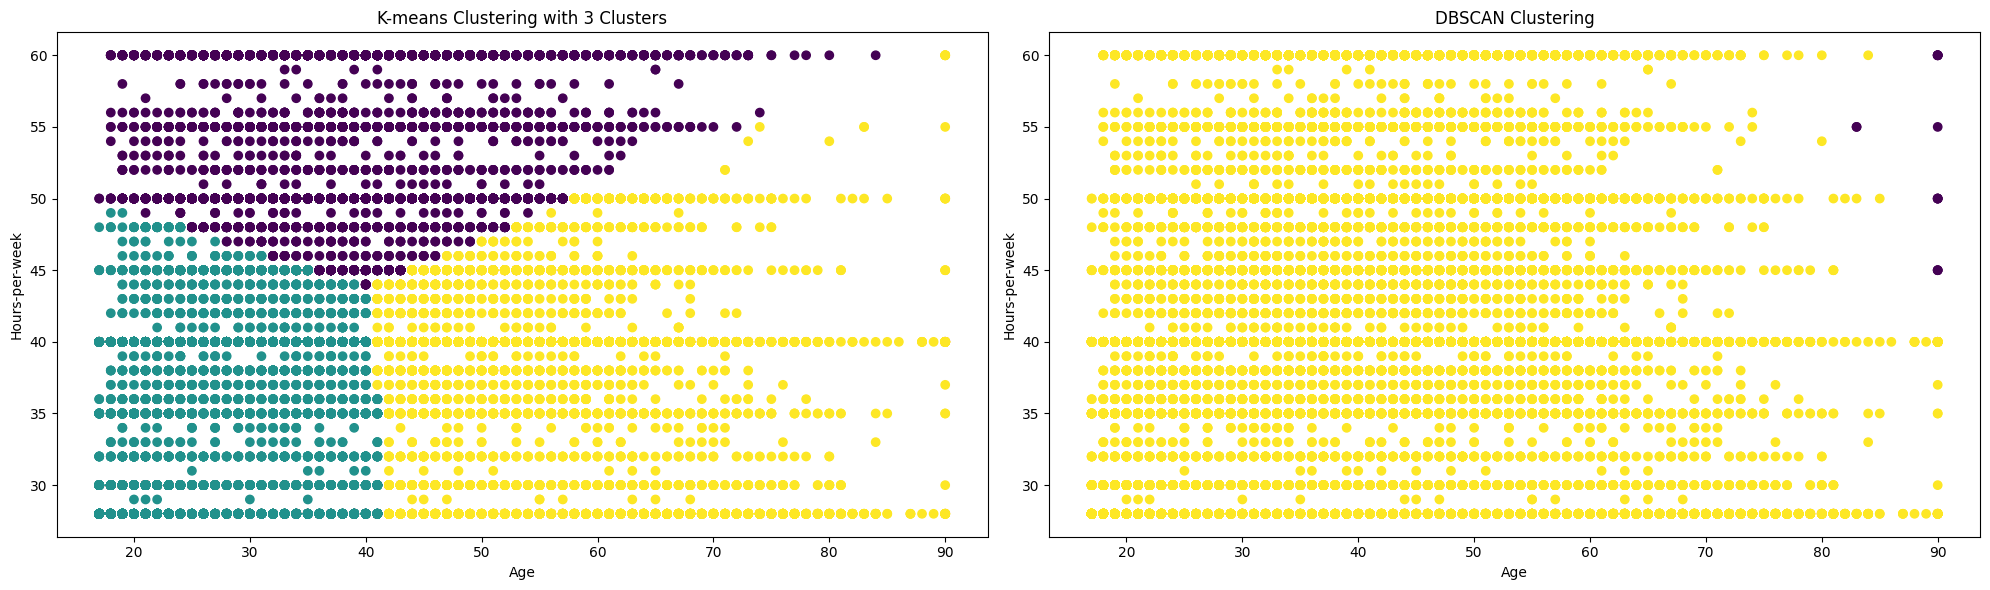

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler


features = data2[['age', 'hours-per-week']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
data2[f'kmeans_cluster_{n_clusters}'] = kmeans.fit_predict(scaled_features)

dbscan = DBSCAN(eps=0.5, min_samples=10)
data2['dbscan_cluster'] = dbscan.fit_predict(scaled_features)

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# K-means plot
ax[0].scatter(data2['age'], data2['hours-per-week'], c=data2[f'kmeans_cluster_{n_clusters}'], cmap='viridis')
ax[0].set_title(f'K-means Clustering with {n_clusters} Clusters')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Hours-per-week')

# DBSCAN plot
ax[1].scatter(data2['age'], data2['hours-per-week'], c=data2['dbscan_cluster'], cmap='viridis')
ax[1].set_title('DBSCAN Clustering')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Hours-per-week')

plt.tight_layout()



In [ ]:
data2 = data.copy()

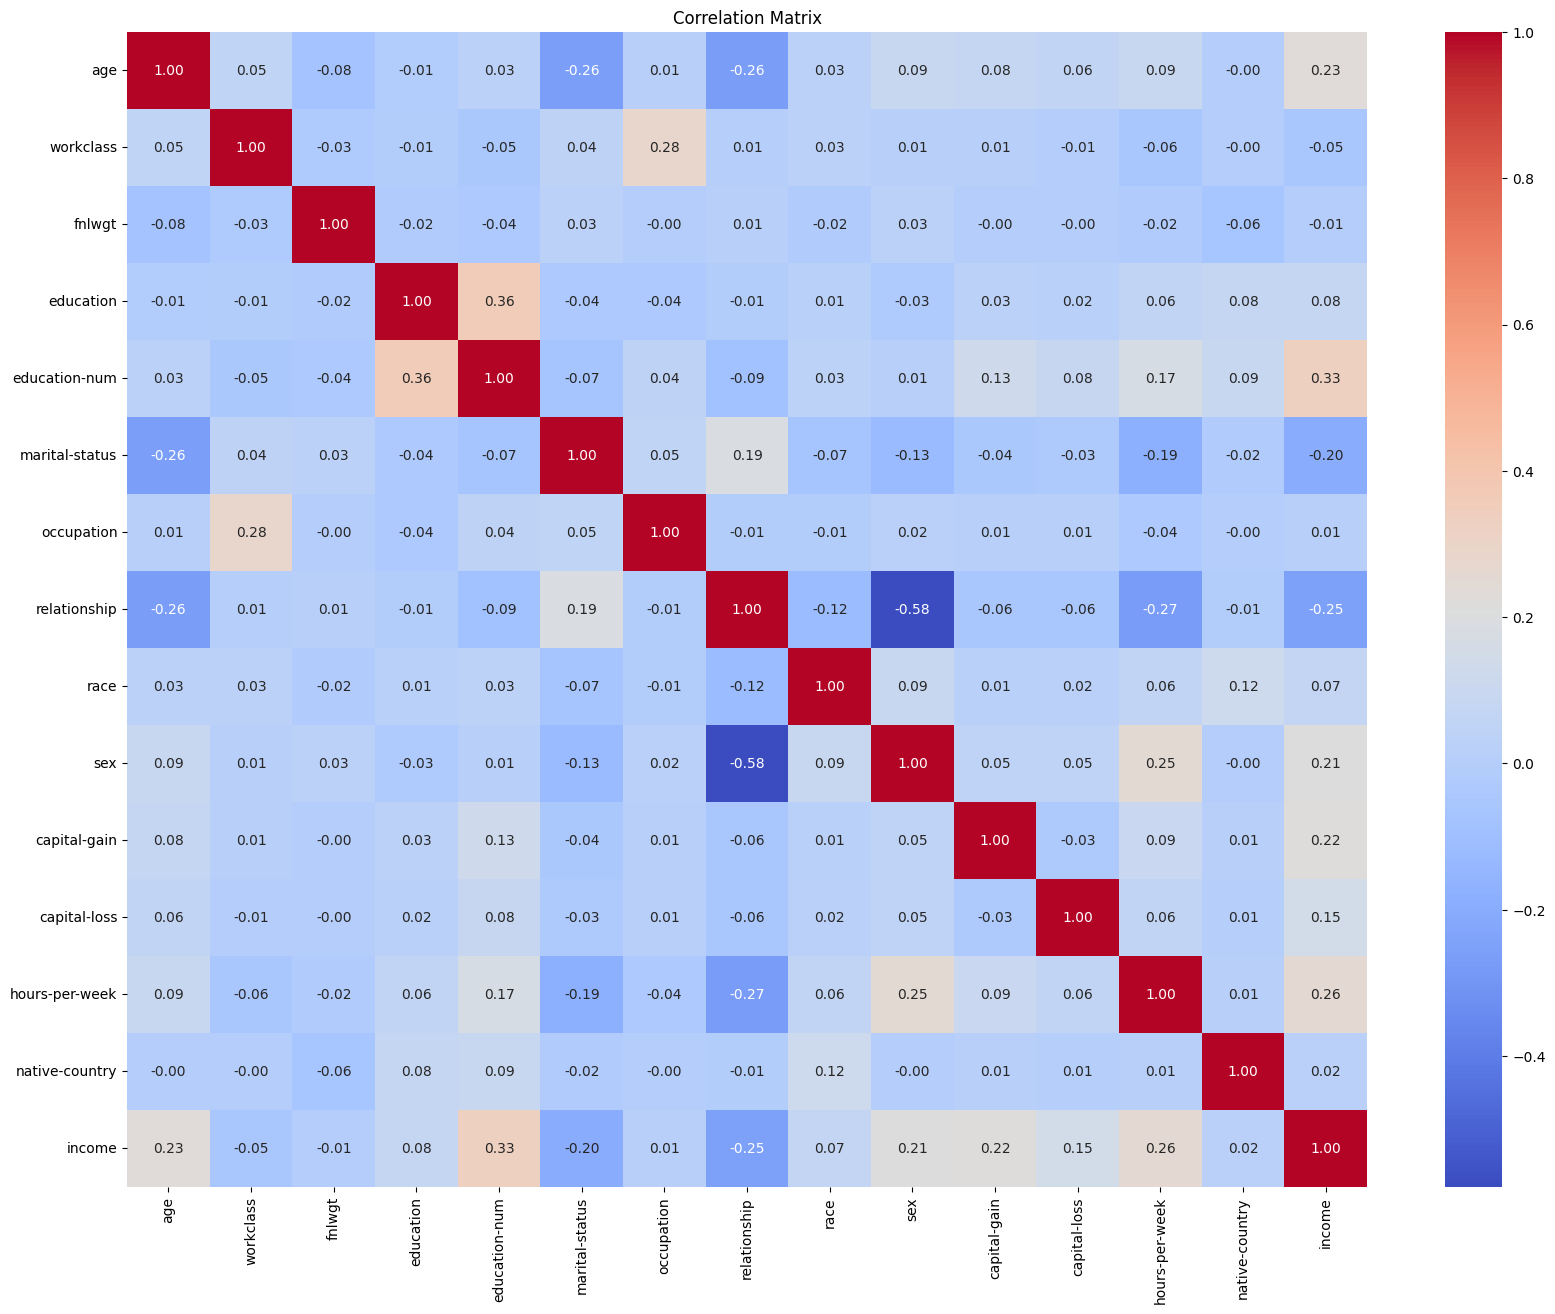

In [ ]:

from sklearn.preprocessing import LabelEncoder


# List of columns to encode
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the categorical columns
for col in categorical_cols:
    data2[col] = label_encoder.fit_transform(data2[col])

# Calculate the correlation matrix
corr_matrix = data2.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# فحص توزيع البيانات في عمود الدخل
income_distribution = data['income'].value_counts()

# طباعة التوزيع
print("Number of non-fraudulent transactions (<=50K):", income_distribution.get('<=50K', 0))
print("Number of fraudulent transactions (>50K):", income_distribution.get('>50K', 0))

Number of non-fraudulent transactions (<=50K): 36518
Number of fraudulent transactions (>50K): 11467


Call this type of data is Imbalanced Data

In [ ]:
scaler = StandardScaler()
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
data2[numeric_columns] = scaler.fit_transform(data2[numeric_columns])

In [ ]:
# Split the data into features and target
X = data2.drop('income', axis=1)
y = data2['income']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  38388
Number transactions test dataset:  9597
Total number of transactions:  47985


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [ ]:
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

print("Baseline Model Evaluation:")
evaluate_model(baseline_model, X_test, y_test)


Baseline Model Evaluation:


(0.8314056475982078,
 0.8196996774169346,
 0.8314056475982078,
 0.8172499904425723)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)




In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier ,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import xgboost as xgb


In [ ]:

model_params = {
    "Logistic Regression": {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear']
        }
    },
    "K-Nearest Neighbors": {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [2, 4, 6],
            'weights': ['uniform', 'distance']
        }

    },
    "Naive Bayes": {
        'model': GaussianNB(),
        'params': {}
    },
    "Decision Tree": {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    "Random Forest": {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [None, 10, 20]
        }
    },
    "Bagging": {
        'model': BaggingClassifier(base_estimator=DecisionTreeClassifier()),
        'params': {
            'n_estimators': [10, 20, 30],
            'base_estimator__max_depth': [None, 10, 20]
        }
    },
    "AdaBoost": {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.5, 1.0, 1.5]
        }
    },
    "Voting": {
        'model': VotingClassifier(estimators=[
            ('lr', LogisticRegression()),
            ('knn', KNeighborsClassifier()),
            ('dt', DecisionTreeClassifier()),
            ('rf', RandomForestClassifier()),
            ('nb', GaussianNB()),
            ('bag', BaggingClassifier(base_estimator=DecisionTreeClassifier())),
            ('ada', AdaBoostClassifier())
        ], voting='hard'),
        'params': {}
    },
        'XGBoost': {
        'model': xgb.XGBClassifier(),
        'params': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5, 6, 7, 8, 9],
        'subsample': [0.6, 0.7, 0.8, 0.9],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9]
        }

}

In [ ]:
results = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_resampled, y_resampled)

    accuracy, precision, recall, f1 = evaluate_model(clf, X_test, y_test)


    results.append({
        'Model': model_name,
        'Best Parameters': clf.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,

    })
    print(f"{model_name} - accuracy: {accuracy}")

results_df = pd.DataFrame(results)



Logistic Regression - accuracy: 0.8310930499114306
K-Nearest Neighbors - accuracy: 0.8219235177659685
Naive Bayes - accuracy: 0.8099406064395124
Decision Tree - accuracy: 0.8619360216734396
Random Forest - accuracy: 0.861102427842034
Bagging - accuracy: 0.8555798687089715
AdaBoost - accuracy: 0.8683963738668334
Voting - accuracy: 0.8476607273106179
XGBoost - accuracy: 0.8776701052412212


In [ ]:
results_df

,Model,Best Parameters,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,"{'C': 0.5, 'solver': 'liblinear'}",0.831093,0.819313,0.831093,0.816934
1,K-Nearest Neighbors,"{'n_neighbors': 2, 'weights': 'uniform'}",0.821924,0.808260,0.821924,0.802429
2,Naive Bayes,{},0.809941,0.792475,0.809941,0.786049
3,Decision Tree,"{'max_depth': 10, 'min_samples_split': 2}",0.861936,0.859392,0.861936,0.860468
4,Random Forest,"{'max_depth': None, 'max_features': 'sqrt', 'n...",0.861102,0.855778,0.861102,0.857166
5,Bagging,"{'estimator__max_depth': None, 'n_estimators':...",0.855580,0.849198,0.855580,0.850542
6,AdaBoost,"{'learning_rate': 0.5, 'n_estimators': 200}",0.868396,0.862879,0.868396,0.863381
7,Voting,{},0.847661,0.848892,0.847661,0.826312
8,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.877670,0.873599,0.877670,0.874526
